In [2]:
!pip install shap
import pandas as pd
import shap
import joblib
import matplotlib as plt


In [4]:
model = joblib.load(r"C:\Users\Admin\OneDrive\Documents\Data Science Portfolio\Lead Scoring\Models\lead_model.plk")
scaler = joblib.load(r"C:\Users\Admin\OneDrive\Documents\Data Science Portfolio\Lead Scoring\Models\lead_scaler.plk")
df = pd.read_csv(r"C:\Users\Admin\OneDrive\Documents\Data Science Portfolio\Lead Scoring\Data\Lead Scoring.csv")


In [14]:
# Preprocess
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.select_dtypes(include = 'object').columns:
    df[col] = le.fit_transform(df[col].astype(str))

X = df.drop('Converted', axis = 1)
X_train_scaled = scaler.transform(X)


In [16]:
#SHAP values to explain the model's predictions on the training data
explainer = shap.Explainer(model, X_train_scaled)
shap_values = explainer(X_train_scaled, check_additivity=False)

100%|===================| 18473/18480 [14:29<00:00]        

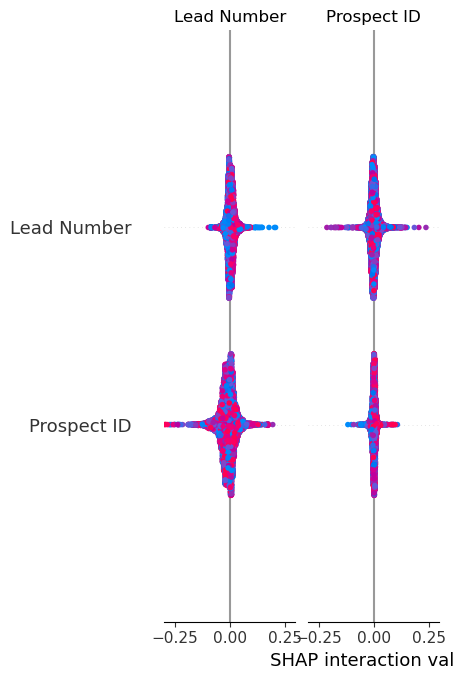

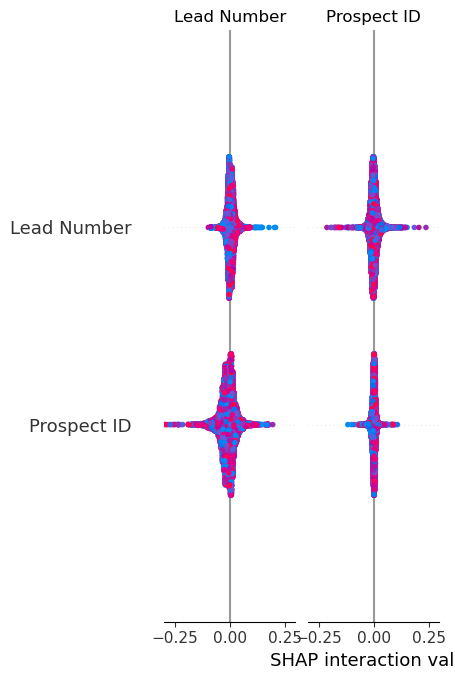

In [17]:
#Summary plot
shap.summary_plot(shap_values, X, plot_type = "bar")
shap.summary_plot(shap_values, X)